In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [39]:
#Create fake with linear relationship to train and to see that linear relationship is working

observations = 1000 
#contains the size of the data set

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
#create 2 1000x1 matrix with random values between -10,10

inputs = np.column_stack((xs,zs))
#combine the two 1000x1 matrix into one matrix
#inputs is now 1000x2 matrix

print(inputs.shape)
#check the shape of the inputs

(1000, 2)


In [40]:
#Elemnts in supervized : inputs, weights, biases, outputs, targets
#inputs and targets are normally defined
#the other tree elemnts to be found, we leave that to the model

In [41]:
noise = np.random.uniform(-1,1,(observations,1))
#this is epsilon

targets = 2*xs - 3*zs + 5 + noise
#this is generated correct value 
#(we assume that it is correct, specific to this case cause we generate the whole data)

print(targets.shape)

(1000, 1)


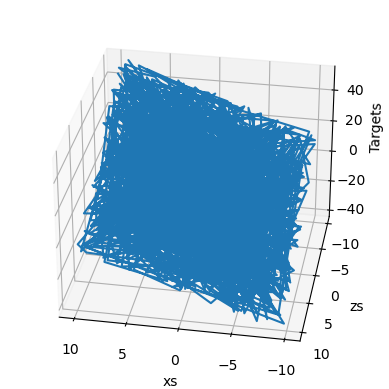

In [42]:
targets = targets.reshape(observations,1)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

In [43]:
#init variables
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))
#2x1 matrix

biases = np.random.uniform(-init_range, init_range, size=1) # we have 1 output
#1x1 matrix

print(weights)
print(biases)

[[ 0.07389895]
 [-0.09381405]]
[0.02356548]


In [44]:
#Setting a learning rate
learning_rate = 0.02

In [45]:
#Train the model
#values to be play around with:
    #number of observations (observations = 1000), 100,000 / 1M
    #learning rate (learning_rate = 0.02)  -> 0.0001, 0.001, 0.1, 1
    #number of iterations 
    #initial range for initializing weights and biases (for i in range(1000))
    
    #in addition you can play with this to observe the algorithm and understand the logic
    #change the function to -> f(x,z) = 13*xs + 7*zs - 12
    #don't divide L2 with 2

#inputs -> 1000x2 matrix
#weights -> 2x1 matrix
#targets -> 1000x1 matrix
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    #outputs -> 1000x1 matrix
    
    deltas = outputs - targets
    #deltas -> 1000x1 matrix
    
    loss = np.sum(deltas ** 2) / 2 / observations
    # loss is a float value
    #we divide by 2 cause -> to get the elegant update rules from the gradient descent
    #we divide by 1000 cause -> to get avarage loss per observation(mean loss)
    #logic of function has not changed
    #this division makes the algorithm independent from number of observation
    #instead of adjusting the learning_rate in every time, we adjust the loss
    #important for -> same learning rate should give us similar results no matter the observation is
    
    print(loss)
    
    deltas_scaled = deltas / observations
    #deltas_scaled -> 1000x1 matrix but a scaled one
    #we divide it with number of observation for independency
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    #inputs -> 1000x2
    #inputs.T -> 2x1000
    #deltas_scaled -> 1000x1
    #weights was -> 2x1 and should be 2x1 that is why we take Transpose of inputs
    
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    #weights and biases are optimized during the loop that's why the outputs(predictions) are optimized too
    #after some value of loop, the value of loss function not changing and stays almost exactly the same
    #in that case we know that the weights, bias, outputs are optimized
    #and that is how we can find the best fitting model for input/target relationship

220.83110444937208
32.054789079894114
13.649303491691256
11.469616249570329
10.86285487183533
10.424244836972063
10.017147276186074
9.62756474175507
9.253533521027727
8.894309462114586
8.549293565125987
8.217922501247834
7.899656490409561
7.593977237768593
7.300386961342053
7.018407567139475
6.747579868993634
6.4874628406153825
6.237632897387042
5.997683206578153
5.767223024843014
5.545877061919085
5.333284869489809
5.12910025421666
4.93299071398455
4.744636896442508
4.563732078957997
4.38998166913793
4.223102725103033
4.062823494734357
3.908882973141629
3.761030477632821
3.619025239492741
3.4826360119059894
3.351640693385689
3.2258259660948507
3.104986948471372
2.9889268615909814
2.8774567087248384
2.7703949675699566
2.667567294651274
2.5688062414140167
2.473950981543978
2.3828470490717573
2.2953460868344027
2.2113056048848674
2.130588748455892
2.053064075100399
1.9786053406455406
1.9070912936118123
1.83840547776246
1.7724360424616443
1.7090755605325412
1.6482208533187794
1.5897728226

In [46]:
print(weights, biases)
# targets = 2*xs - 3*zs + 5 + noise

[[ 1.99924274]
 [-2.99886211]] [4.35719705]


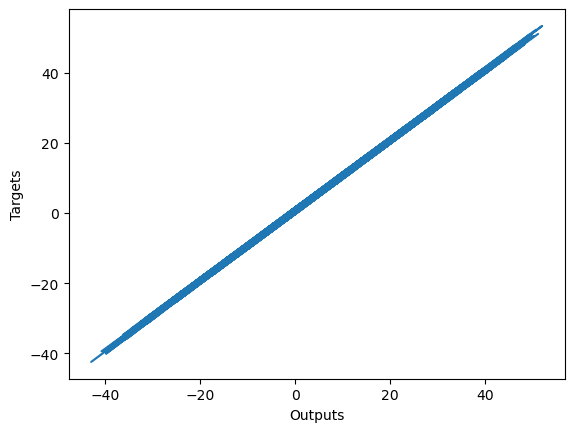

In [47]:
#plot last outputs vs targets
# if the slope is around 45 degree, we're good to go!

plt.plot(outputs,targets)
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()